In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\abhinaya\Downloads\position_salary (1).csv', encoding='latin-1')
df.head()

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education           3391 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB


In [7]:
df.describe()

,Experience (Years),Salary
count,3467.000000,3.467000e+03
mean,16.639746,1.487459e+06
std,6.935259,5.776934e+05
min,5.000000,5.026890e+05
25%,11.000000,9.818155e+05
50%,17.000000,1.475343e+06
75%,23.000000,1.985568e+06
max,28.000000,2.499925e+06


In [8]:
df.isnull() .sum()

Position              19
Location               0
Gender                24
Education             76
Experience (Years)     0
Salary                 0
dtype: int64

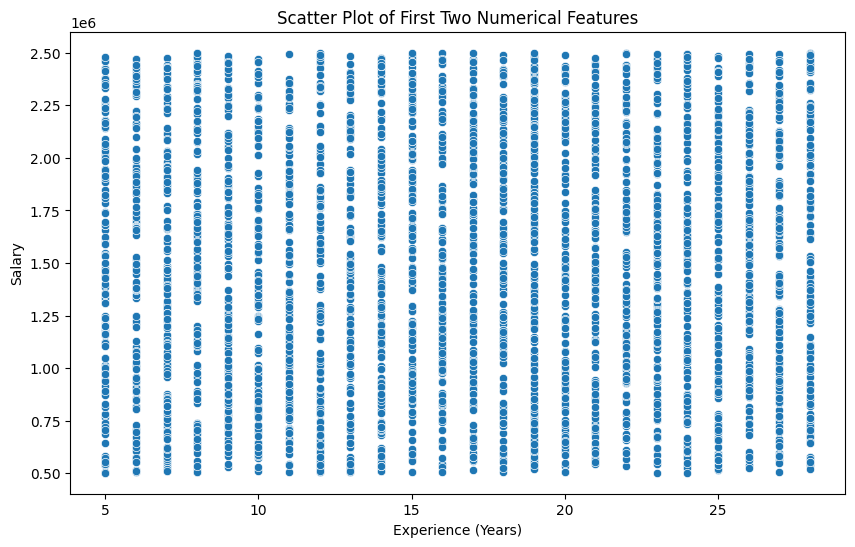

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.select_dtypes(include=['number']).columns[0], 
                y=df.select_dtypes(include=['number']).columns[1], 
                data=df)
plt.title("Scatter Plot of First Two Numerical Features")
plt.show()

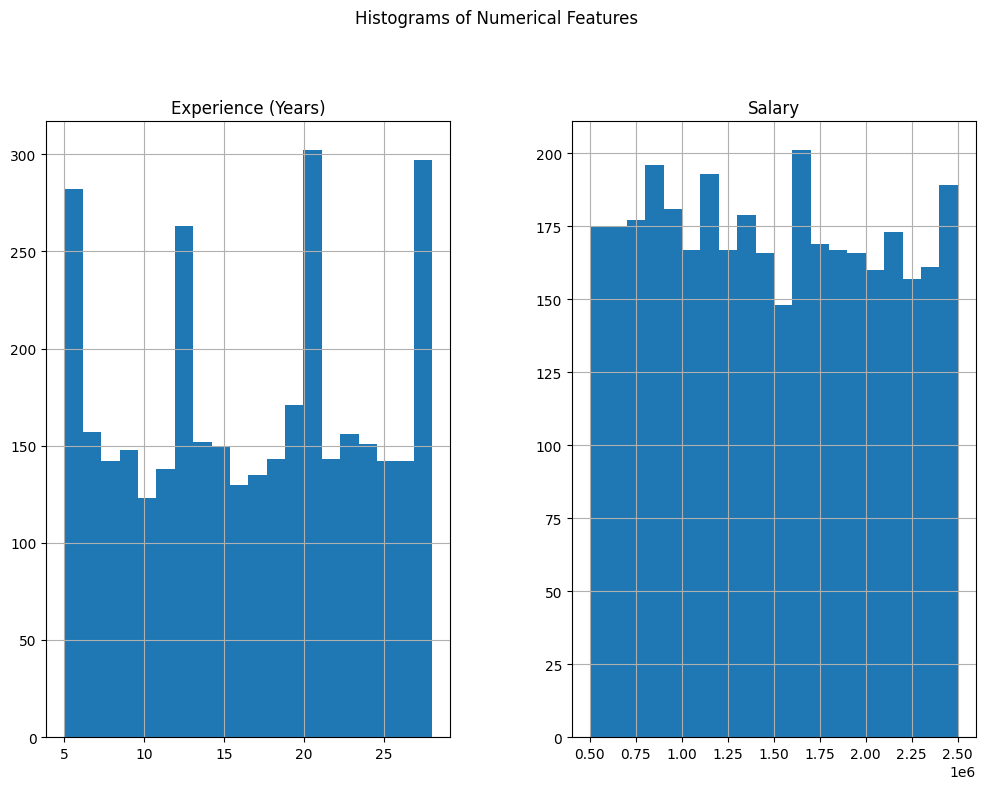

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df.select_dtypes(include=['number']).hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

<Figure size 1200x600 with 0 Axes>

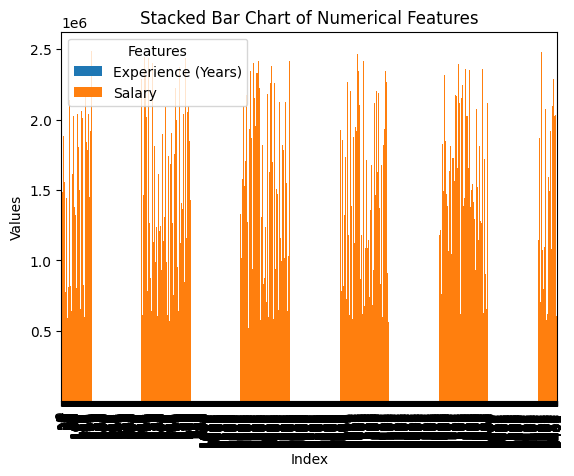

In [8]:
plt.figure(figsize=(12,6))
df.select_dtypes(include=['number']).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Numerical Features")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(title="Features")
plt.show()

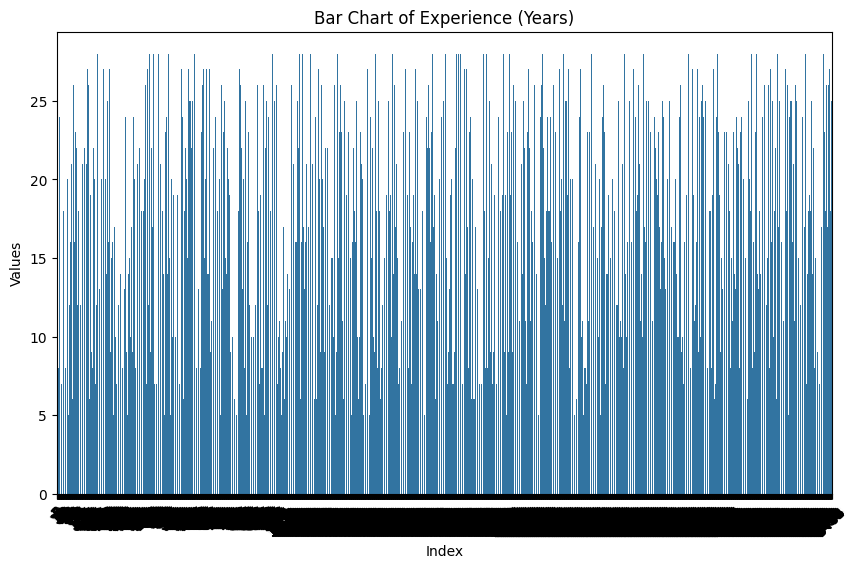

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
column_to_plot = df.select_dtypes(include=['number']).columns[0]
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y=df[column_to_plot])
plt.xticks(rotation=45)
plt.title(f"Bar Chart of {column_to_plot}")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.51666731 0.48333269]


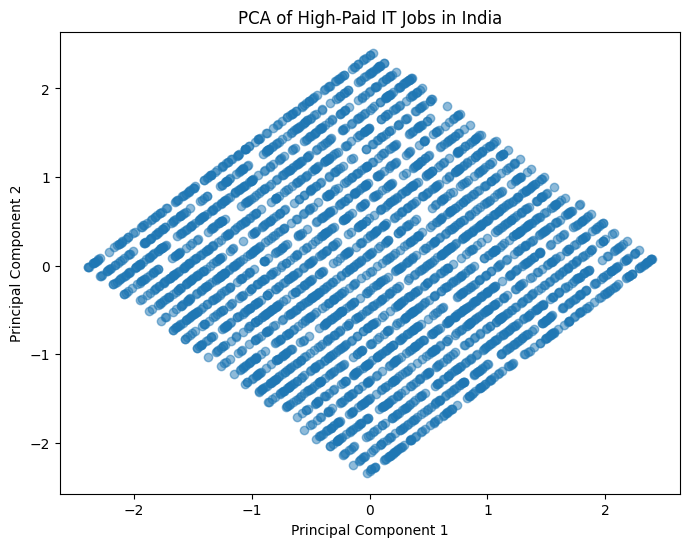

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of High-Paid IT Jobs in India")
plt.show()

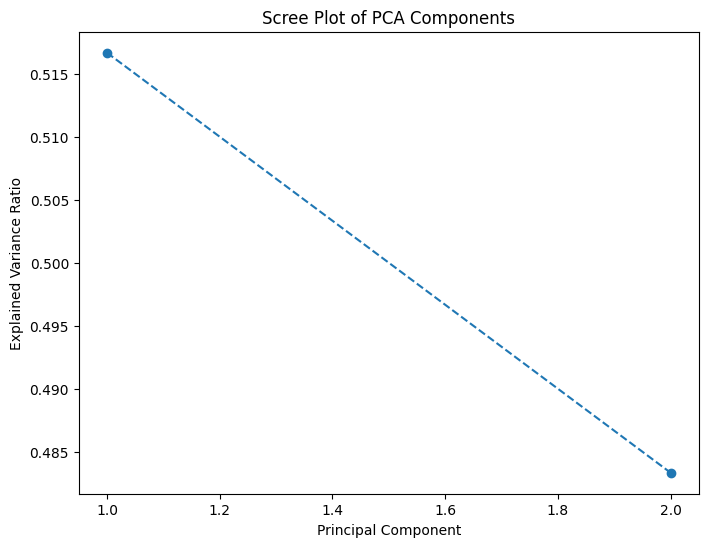

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA Components")
plt.show()

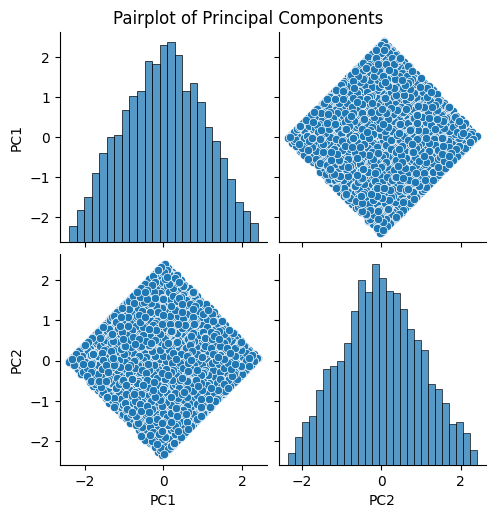

In [16]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
sns.pairplot(pca_df)
plt.suptitle("Pairplot of Principal Components", y=1.02)
plt.show()